# Import Libraries

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Μερος 1

## Load Dataset

In [209]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1.a περιγράψτε το κάθε χαρακτηριστικό με μέση τιμή, τυπική απόκλιση, ελάχιστη και μέγιστη τιμή (df.describe())

In [210]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Plot Variables

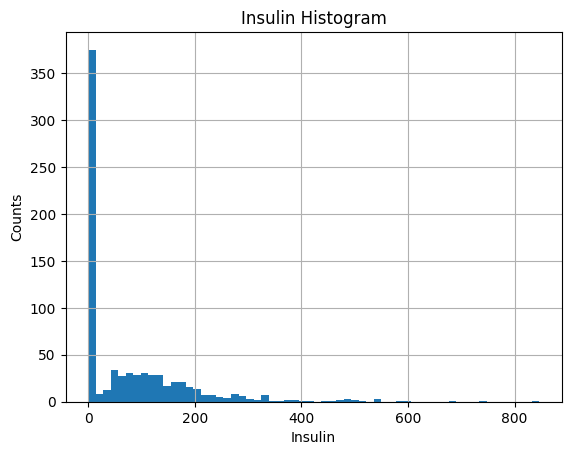

In [211]:
df['Insulin'].hist(bins=60)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

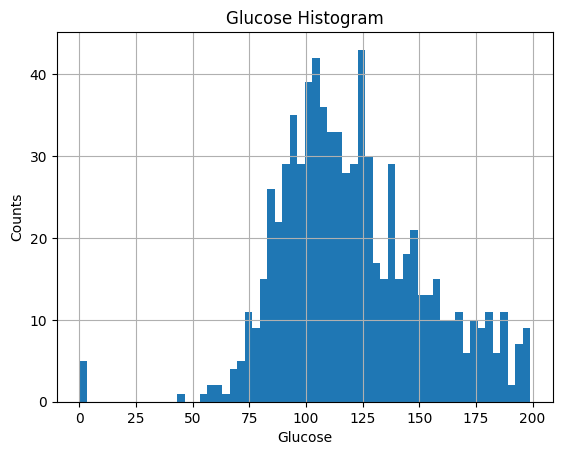

In [212]:
df['Glucose'].hist(bins=60)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

### 1.b δημιουργήστε το ιστόγραμμα (Histogram) για κάθε χαρακτηριστικό. Για το Outcome, να δημιουργηθεί ραβδόγραμμα (Bar Plot), εφόσον έχει μόνο 2 τιμές.


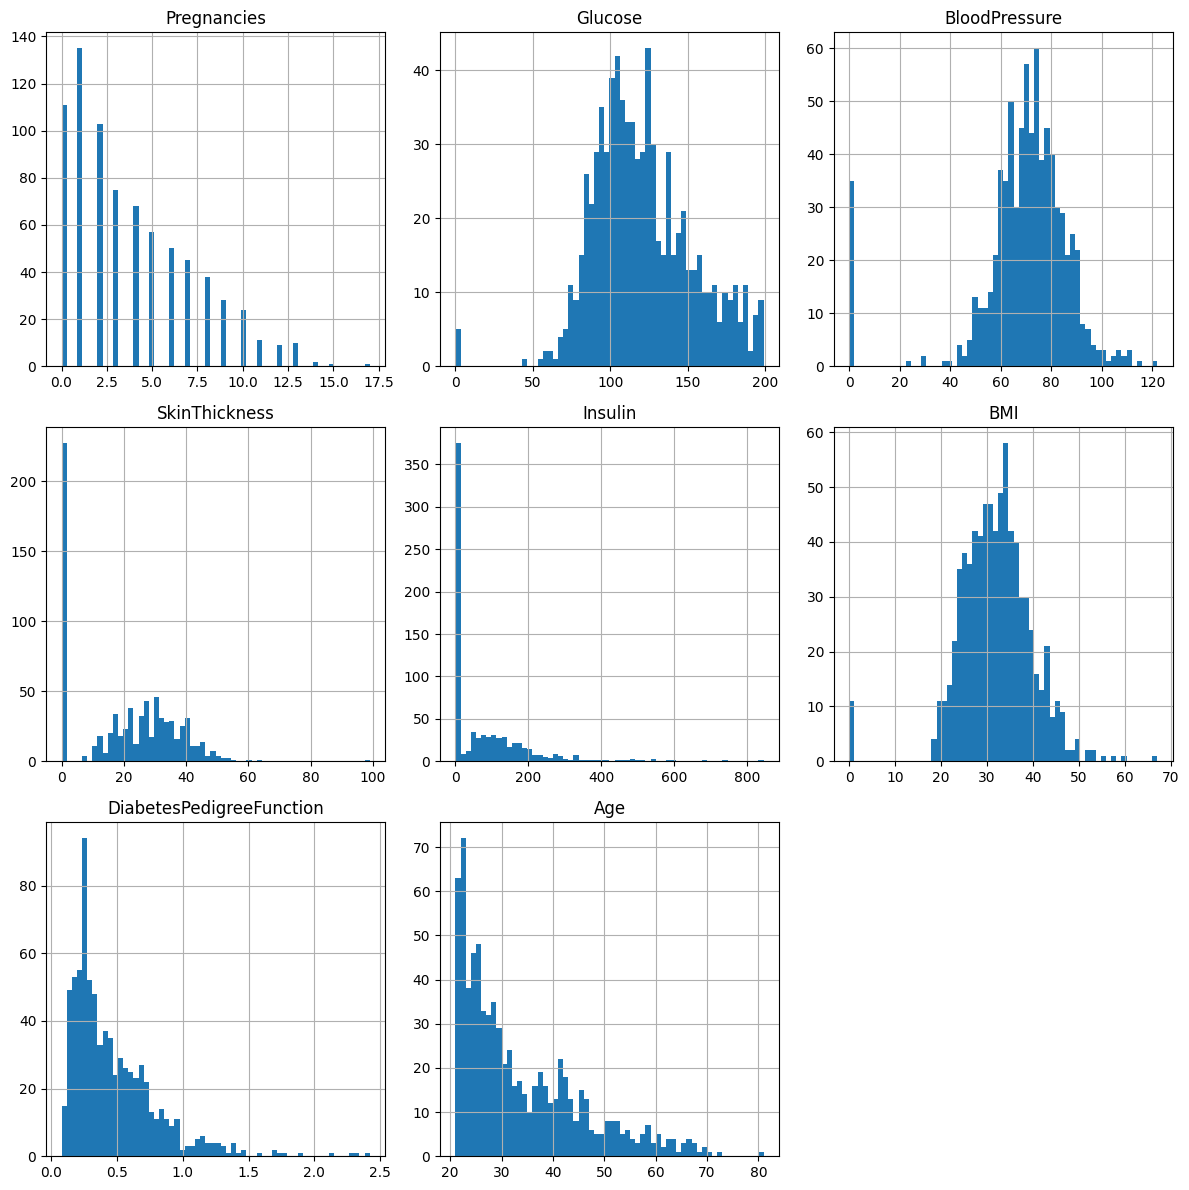

In [213]:
feats_df = df.drop(columns=['Outcome'])
outc_df = df['Outcome']
feats_df.hist(bins=60, figsize=(12,12))
plt.tight_layout()
plt.show()

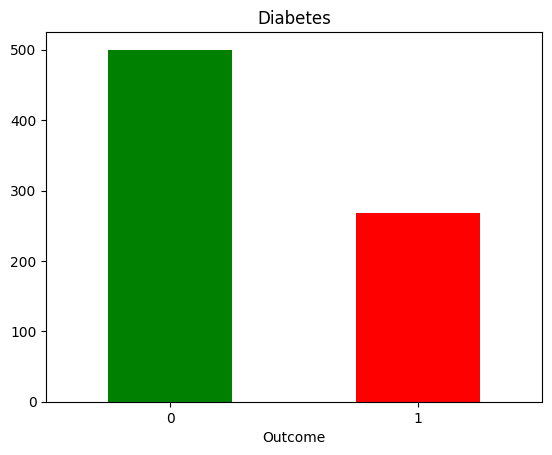

In [214]:
outc_df.value_counts().plot(kind='bar', color=['green','red'], title='Diabetes')
plt.xticks(rotation=0)
plt.show()

## 2. Θεωρείτε πως η ποιότητα των δεδομένων είναι καλή ή κακή? Αιτιολογείστε, αξιοποιώντας τις πληροφορίες από ερώτημα (1). Δώστε τουλάχιστον 2 επιχειρήματα.

In [215]:
print(df.keys())

zero_counts = {c: int((df[c] == 0).sum()) for c in df.keys()}
for col, cnt in zero_counts.items():
    print(f"Zeros in {col}: {cnt}")

outcome_vc = df["Outcome"].value_counts(dropna=False).sort_index().to_dict()  # ensure {0: x, 1: y}
print("Outcome counts:", outcome_vc)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Zeros in Pregnancies: 111
Zeros in Glucose: 5
Zeros in BloodPressure: 35
Zeros in SkinThickness: 227
Zeros in Insulin: 374
Zeros in BMI: 11
Zeros in DiabetesPedigreeFunction: 0
Zeros in Age: 0
Zeros in Outcome: 500
Outcome counts: {0: 500, 1: 268}


**Δεν ειναι καλη η ποιοτητα.**
- Ειναι προφανες απο τα γραφηματα οτι τα features εχουν πολλα **μηδενικα** τα οποια δεν ειναι λογικο να υπαρχουν, πραγμα που μαλλον υποδηλωνει missing values. Εξαιρειται η κατηγορια εγκυμοσυνης καθως το 0 εκει εχει νοημα (0 φορες εγκυος).
- Επισης, παρατηρω το φαινομενο του **data imbalance** στα features και στα Outcomes. ΠΧ. στα plots παρατηρω οτι εχουμε πολλα δεδομενα απο ινσουλινη κατω απο 200 και λιγα για πιο πανω και η κατανομη ειναι dominated απο ανθρωπους 20-40. Εχουμε 500 περιπτωσεις χωρις διαβητη vs 268 περιπτωσεις με διαβητη. Επειδη οι σπανιες περιπτωσεις παρεχουν πιο πολυ πληροφορια για την προβλεψη διαβητη το να εχουμε imbalanced dataset μπορει να οδηγησει στο να χασουμε αυτη την σπανια πληροφορια (χαμηλοτερα βαρυ) ειδικα σε γραμμικα μοντελα. Τελος ο ταξινομιτης ειναι πιο πιθανο να δωσει βαρυτητα στα Outcomes χωρις διαβητη αφου βλεπει οτι ερχεται πιο συχνα σαν αποτελεσμα. Θα δωσει δηλαδη λανθασμενα περισσοτερο bias προς σε αυτην την περιπτωση.

## 3. Τι κατανομή ακολουθεί η μεταβλητή Age? Είναι καλή η κατανομή αυτή για τη κατασκευή της συγκεκριμένης εφαρμογής? Αιτιολογείστε.

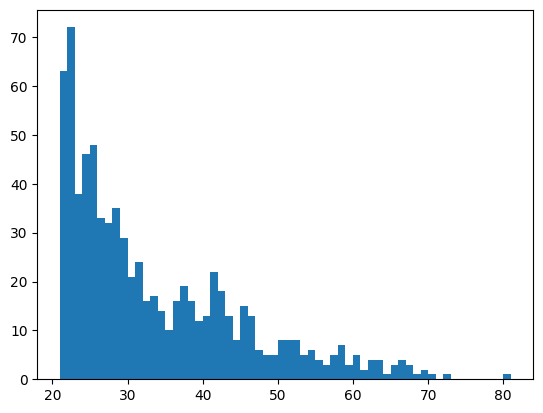

In [216]:
plt.hist(df['Age'], bins=60)
plt.show()

Φαινεται να ακολουθει negative exponential distribution. Ειναι dominated απο ανθρωπους 20-40 ετων, με αρκετα λιγοτερα αποτελεσματα απο ανω των 60 ετων. </br>
Δεν ειναι καλη αυτη η κατανομη για το μοντελο μας γιατι αυτη η ασυμμετρια ενδεχομένως να οδηγησει προβληματα στις underepresented ηλικιες και συνεπως να υπολογιζει λανθασμενες πιθανοτητες για αυτες τις ηλικιες. </br>
Ιδανικα θα θελαμε απο μια ερευνα να ειχαμε μια ιση κατανομη αναμεσα σε ολες τις ηλικιες.

## 4. Σύμφωνα με κλινικές μελέτες, αν κάποιος ασθενής έχει υψηλά επίπεδα γλυκόζης, είναι πολύ πιθανό να εμφανίσει διαβήτη. Να Δείξετε αν και πως διαπιστώνεται αυτό από τα δεδομένα.

In [217]:
glucose_df = df['Glucose'].replace(0, np.nan)
mean_glucose_by_diabetes = glucose_df.groupby(df["Outcome"]).mean()
mean_glucose_by_diabetes

Outcome
0    110.643863
1    142.319549
Name: Glucose, dtype: float64

In [218]:
std_glucose_by_diabetes = glucose_df.groupby(df["Outcome"]).std()
std_glucose_by_diabetes

Outcome
0    24.776906
1    29.599199
Name: Glucose, dtype: float64

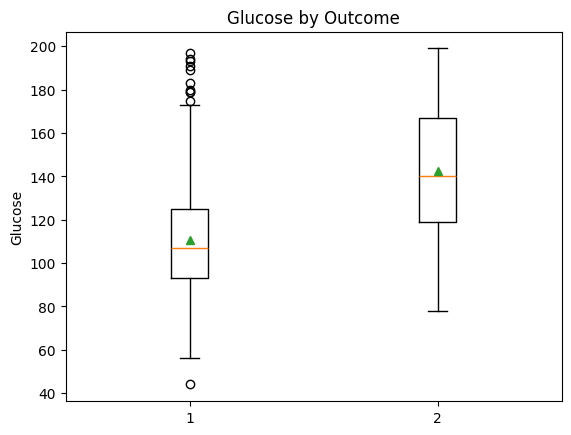

In [219]:
data = [glucose_df[outc_df==0].dropna(), glucose_df[outc_df==1].dropna()]
plt.boxplot(data, showmeans=True)
plt.ylabel("Glucose")
plt.title("Glucose by Outcome")
plt.show()

Οι μεσες τιμες  σε συνδυασμο με το box plot, δειχνει καθαρη μετατοπιση της κατανομης γλυκοζης προς υψηλοτερες τιμες στην ομαδα με θετικο διαγνωστικο αποτελεσμα διαβητη. Με αλλα λογια, οπτικα, η μεση τιμη και η διασπορα οδηγουν στο συμπεασμα οτι οι διαβητικοι εχουν, κατα μεσο ορο, αυξημενη γλυκοζη. Συνεπως, τα δεδομενα στηριζουν τη συνδεση αναμεσα στα υψηλοτερα επιπεδα γλυκοζης και τον αυξημενο κινδυνο εμφανισης διαβητη.

# Convert DataFrame to Numpy arrays

In [220]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

## 5. Split Dataset to Train-Test

Train Samples: 691
Test Samples: 77

In [221]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

## 6. Create a Logistic Regression Model

In [222]:
model = LogisticRegression(max_iter=1000, random_state=seed)

### Train model on training set

In [223]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [224]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [225]:
y_pred_train = model.predict(x_train)
y_pred_train

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [226]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'(Test set) The accuracy of the model is: {accuracy_percentage}')

(Test set) The accuracy of the model is: 77.92


In [227]:
accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage = round(accuracy*100, 2)

print(f'(Train set) The accuracy of the model is: {accuracy_percentage}')

(Train set) The accuracy of the model is: 76.54


### Τι παρατηρείτε για την ακρίβεια του test set σε σχέση με του train set?


Απο την στιγμη που οι τιμες ειναι κοντινες σημαινει οτι εχει καλη γενικευση, αλλα το σκορ και στις 2 περιπτωσεις ειναι αρκετα χαμηλο.

## 7. Δουλεύει καλά ο ταξινομητής σας για όλες τις ηλικίες? Παρουσιάστε ραβδόγραμμα (bar plot) με την ακρίβεια ανά ομάδα ηλικιών 0 ως 25, 25 ως 50 και >50 του test set.


In [228]:
labels = ['0-25','25-50','>50']
acc = pd.Series(y_pred == y_test).groupby(pd.cut(df['Age'], [0,25,50,100], labels=labels), observed=False).mean()
acc




Age
0-25     0.662162
25-50    0.825758
>50      0.880000
dtype: float64

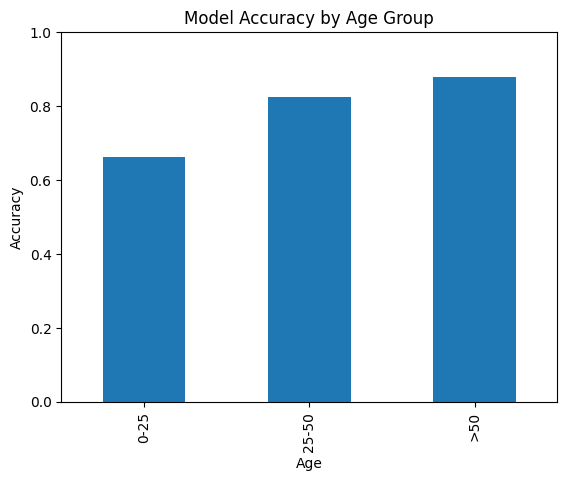

In [229]:
acc.plot(kind='bar', ylim=(0,1), title='Model Accuracy by Age Group'); plt.ylabel('Accuracy')
plt.show()

Φαινεται οτι εχει καλυτερη ακριβεια στις μεγαλυτερες ηλικιες.

## 8. Τι θεωρείτε πως είναι χειρότερο για τον ταξινομητή σας στη συγκεκριμένη εφαρμογή, να προβλέπει ότι κάποιος ασθενής έχει διαβήτη, χωρίς να έχει, ή ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ έχει? Αιτιολογήστε.


- αν το μοντελο πει "εχεις διαβητη" ενω δεν εχεις (ψευδως θετικο): περιττες εξετασεις αλλα εκει ξεκαθαριζει γρηγορα οτι δεν υπαρχει προβλημα.
- αν το μοντελο πει "δεν εχεις" ενω εχεις (ψευδως αρνητικο): εκει τα πραγματα σοβαρευουν. χανεται εγκαιρη θεραπεια και ανοιγει ισος ο δρομος για επιπλοκες. </br>
Συνεπως, καλυτερα να εντοπιζουμε ολους τους πιθανους ασθενεις (δηλ. να ανεβαζουμε την ευαισθησια/recall) και να ανεχομαστε μερικα ψευδως θετικα, παρα να μας ξεφυγουν αληθινα περιστατικα που μπορουν να γινουν επικινδυνα.

## 9. Επαναλάβετε τις διαδικασίες 5-6 (με μία for loop), χρησιμοποιώντας seed από 0 ως 9. Υπολογίστε μέσο όρο και τυπική απόκλιση της ακρίβειας σας.

In [230]:
test_acc, train_acc = [], []
for seed in range(10):
    test_size = 0.3

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    x_train.shape, x_test.shape, y_train.shape, y_test.shape
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = round(test_accuracy*100, 2)
    test_acc.append(accuracy_percentage)
    

    print(f'[Seed: {seed}](Test set) The accuracy of the model is: {accuracy_percentage}')
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    accuracy_percentage = round(train_accuracy*100, 2)
    train_acc.append(accuracy_percentage)

    print(f'[Seed: {seed}](Train set) The accuracy of the model is: {accuracy_percentage}')
print('\n---\n')
print(f'Overall Test Accuracy: Mean = {np.mean(test_acc):.2f}%, Std = {np.std(test_acc):.2f}%')
print(f'Overall Train Accuracy: Mean = {np.mean(train_acc):.2f}, Std = {np.std(train_acc):.2f}%')

[Seed: 0](Test set) The accuracy of the model is: 77.92
[Seed: 0](Train set) The accuracy of the model is: 76.54
[Seed: 1](Test set) The accuracy of the model is: 78.35
[Seed: 1](Train set) The accuracy of the model is: 77.28
[Seed: 2](Test set) The accuracy of the model is: 74.89
[Seed: 2](Train set) The accuracy of the model is: 78.58
[Seed: 3](Test set) The accuracy of the model is: 75.32
[Seed: 3](Train set) The accuracy of the model is: 78.77
[Seed: 4](Test set) The accuracy of the model is: 80.95
[Seed: 4](Train set) The accuracy of the model is: 75.98
[Seed: 5](Test set) The accuracy of the model is: 78.35
[Seed: 5](Train set) The accuracy of the model is: 76.35
[Seed: 6](Test set) The accuracy of the model is: 76.62
[Seed: 6](Train set) The accuracy of the model is: 76.91
[Seed: 7](Test set) The accuracy of the model is: 77.92
[Seed: 7](Train set) The accuracy of the model is: 78.21
[Seed: 8](Test set) The accuracy of the model is: 77.92
[Seed: 8](Train set) The accuracy of the

Αν και δεν ειναι πολυ υψηλο το accuracy εχει ικανοποιητικη αποδοση επειδη η τυπικη αποκλιση παραμενει σταθερα χαμηλη

## 10.a. Εφαρμόστε κανονικοποίηση των δεδομένων Min-Max: x'=x-xminxmax-xmin (εκτός της μεταβλητής Target).

In [231]:
test_acc, train_acc = [], []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
pipe = Pipeline([
        ("scale", MinMaxScaler()),
        ("clf",   LogisticRegression(max_iter=1000, random_state=seed))
    ])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)
test_accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(test_accuracy*100, 2)
test_acc.append(accuracy_percentage)


print(f'[Seed: {seed}](Test set) The accuracy of the model is: {accuracy_percentage}')
train_accuracy = accuracy_score(y_train, y_pred_train)

accuracy_percentage = round(train_accuracy*100, 2)
train_acc.append(accuracy_percentage)

print(f'[Seed: {seed}](Train set) The accuracy of the model is: {accuracy_percentage}')

[Seed: 9](Test set) The accuracy of the model is: 74.89
[Seed: 9](Train set) The accuracy of the model is: 78.77


# Feature Importance

The larger the absolute weight value, the better

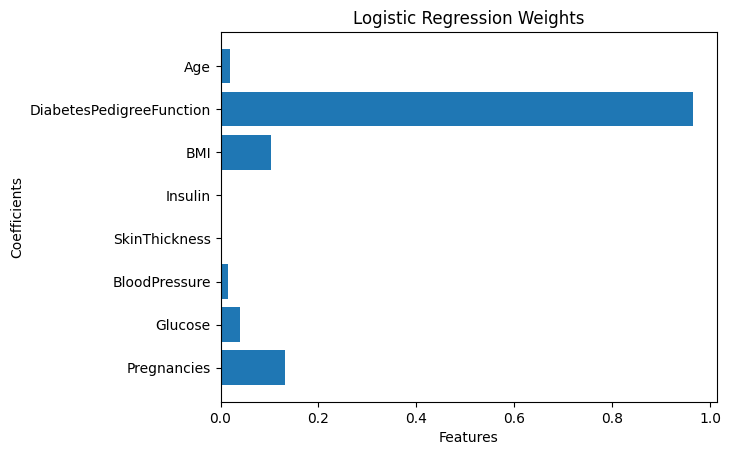

In [232]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Evaluate Patients with Age < 40

In [233]:
input_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [234]:
# Create a mask that filters patients with age < 40. Age is found at x_test[:, 7]
age_index = 7
mask_40 = x_test[:, 7] < 40

x_test_40 = x_test[mask_40]
y_test_40 = y_test[mask_40]
y_pred_40 = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 74.89


## 10.b. Στη συνέχεια, να αναφέρετε τους 3 πιο σημαντικούς παράγοντες (συντελεστές) που επηρεάζουν την πρόβλεψη του διαβήτη. Αιτιολογείστε.

Οι 3 πιο σημαντικοί παράγοντες (με Logistic Regression):
- Diabetes Pedigree Function 
- BMI  
- Pregnancies</br>
</br>Οπως φαινεται και στο σχημα τα μεγαλυτερα βαρυ εχουν μεγαλυτερο importance στο μοντελο αρα αυτα ειναι τα πιο σημαντικα features.

# Μερος 2

## 1.a. Φορτώστε το σύνολο δεδομένων diabetes.csv. Δημιουργήστε Numpy arrays με inputs (x) και targets (y), όπου x: (Pregnancies, Blood Pressure, BMI, Age) και y η μεταβλητή Glucose.

In [235]:
x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Glucose'].values

## 1.b. Xωρίστε το σύνολο δεδομένων σε σύνολα εκπαίδευσης-επικύρωσης (train-validation) με ποσοστό 70-30% με 0 seed.

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

## 2. Χρησιμοποιείστε Γραμμική παλινδρόμηση της scikit-learn, ώστε να προβλέψετε την ποσότητα γλυκόζης στο test set και μετρήστε την ακρίβεια με κατάλληλη μετρική.

In [237]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 929.8883492746899
Mean Absolute Error: 23.599990462075155


## 2.b. Ποια μετρική είναι καταλληλότερη: Mean Squared Error (MSE) ή Mean Absolute Error (MAE)? Αιτιολογείστε. 

Επειδη η γλυκοζη περιεχει outliers και μηδενικα εχει πιο πολυ νοημα να χρησιμοποιησουμε median absolute error αντι για mean squared error καθως το MSE τεινει στο να δινει πιο μεγαλη βαρυτητα στα outliers.

## 3. Επαναλάβετε το ερώτημα (2) χρησιμοποιώντας Lasso Regression (Linear + L1). Δοκιμάστε τιμές (0.2, 0.4, 0.6, 0.8, 1.0) για το βάρος  (alpha στην scikit-learn) και κατασκευάστε πινακάκι με την ακρίβεια, χρησιμοποιώντας τη μετρική του ερωτήματος 2.

In [ ]:
from sklearn.linear_model import Lasso
results = []
lasso_vals = [0.2, 0.4, 0.6, 0.8, 1.0]
maes= []
for alpha in lasso_vals:
    lasso_model = Lasso(alpha=alpha, max_iter=2000)
    lasso_model.fit(x_train, y_train)
    y_pred = lasso_model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    results.append((alpha, mae))
print ('alpha, Mean Absolute Error')
results

alpha, Mean Absolute Error


[(0.2, 23.594203291229196),
 (0.4, 23.588415321304854),
 (0.6, 23.58262934003747),
 (0.8, 23.576843358770088),
 (1.0, 23.5710576280913)]